In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

In [20]:
df = pd.read_csv('C:\\Users\\91242\\Desktop\\imdb_movies.csv')
pairs = {}
for i in range(len(df)):
    actors = df.at[i, 'Actors'].split(',')
    for actor in actors:
        if pairs.get(actor, None) != None:
            pairs[actor] |= set(df.at[i, 'Genre'].split(','))
        else:
            pairs[actor] = set(df.at[i, 'Genre'].split(','))

pairs = sorted(list(pairs.items()), key=lambda item: item[0])
index = [item[0] for item in pairs]
data = [item[1] for item in pairs]
df1 = pd.DataFrame({'演员': index, '类型': data})

df1

,演员,类型
0,50 Cent,"{Mystery, Crime, Action}"
1,A.C. Peterson,"{Horror, Action}"
2,AJ Michalka,"{Mystery, Sci-Fi, Thriller}"
3,Aamir Khan,"{Music, Drama, Family}"
4,Aaron Burns,"{Drama, Adventure, Horror, Thriller}"
...,...,...
2389,Zach Galifianakis,"{Action, Comedy, Crime}"
2390,Zachary Gordon,"{Comedy, Family}"
2391,Zachary Quinto,"{Biography, Drama, Thriller}"
2392,Zoey Deutch,"{Comedy, Fantasy, Action}"


In [21]:
df1['数量'] = df1['类型'].apply(lambda x: len(x))
df1

,演员,类型,数量
0,50 Cent,"{Mystery, Crime, Action}",3
1,A.C. Peterson,"{Horror, Action}",2
2,AJ Michalka,"{Mystery, Sci-Fi, Thriller}",3
3,Aamir Khan,"{Music, Drama, Family}",3
4,Aaron Burns,"{Drama, Adventure, Horror, Thriller}",4
...,...,...,...
2389,Zach Galifianakis,"{Action, Comedy, Crime}",3
2390,Zachary Gordon,"{Comedy, Family}",2
2391,Zachary Quinto,"{Biography, Drama, Thriller}",3
2392,Zoey Deutch,"{Comedy, Fantasy, Action}",3


In [22]:
result = df1['数量'].max()
result

12

In [23]:
ans = df1[df1['数量']==result]
ans

,演员,类型,数量
574,Hugh Jackman,"{Biography, Romance, Animation, Sci-Fi, Action...",12
1927,Jake Gyllenhaal,"{Romance, Sci-Fi, History, Action, Thriller, S...",12
1991,Johnny Depp,"{Biography, Romance, Action, Comedy, Mystery, ...",12


<Figure size 432x288 with 0 Axes>

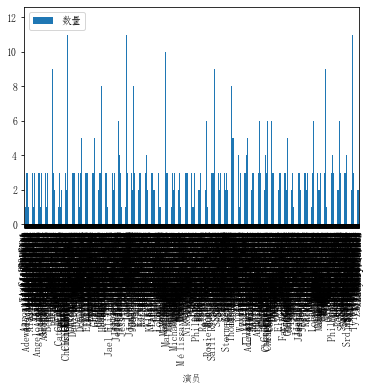

In [26]:
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
plt.figure()
df1.plot(x='演员',y='数量',kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

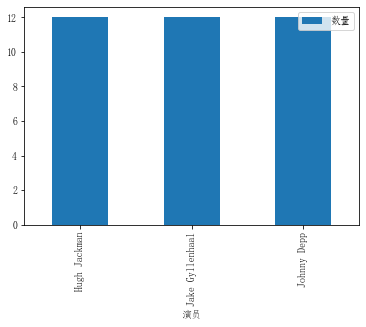

In [27]:
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
plt.figure()
ans.plot(x='演员',y='数量',kind='bar')
plt.show()